In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns

In [2]:
col_names = list(range(500)) + ['particle_type','energy','gamma_a','gamma_b','peak_loc','ltot','covaa','covab','covba','covbb']
df_ns = pd.read_csv('SinglePeaksNoShift.csv', names = col_names, header = None)

In [3]:
energies = np.array([10,30,70,100,300,700,1000,3000,7000,10000])
particle_types = ['PION','PION-','KAONLONG','PROTON','APROTON','NEUTRON']
dct_ns = {}
for particle in particle_types:
    dct_ns[particle] = {}
    for energy in energies:
        dct_ns[particle][energy] = []

for i in range(len(df_ns)):
    dct_ns[df_ns.particle_type[i]][df_ns.energy[i]].append(np.array(df_ns.iloc[[i],0:500]))

In [4]:
gamma_a_dct_ns = {}
gamma_b_dct_ns = {}
gamma_cov_dct_ns = {}
peak_loc_dct_ns = {}
ltot_dct_ns = {}
for particle in particle_types:
    gamma_a_dct_ns[particle] = {}
    gamma_b_dct_ns[particle] = {}
    gamma_cov_dct_ns[particle] = {}
    peak_loc_dct_ns[particle] = {}
    ltot_dct_ns[particle] = {}
    for energy in energies:
        gamma_cov_dct_ns[particle][energy] = []
        gamma_a_dct_ns[particle][energy] = []
        gamma_b_dct_ns[particle][energy] = []
        peak_loc_dct_ns[particle][energy] = []
        ltot_dct_ns[particle][energy] = []

for i in range(len(df_ns)):
    gamma_a_dct_ns[df_ns.particle_type[i]][df_ns.energy[i]].append(df_ns.gamma_a[i])
    gamma_b_dct_ns[df_ns.particle_type[i]][df_ns.energy[i]].append(df_ns.gamma_b[i])
    gamma_cov_dct_ns[df_ns.particle_type[i]][df_ns.energy[i]].append(np.array([[df_ns.covaa[i],df_ns.covab[i]],[df_ns.covba[i],df_ns.covbb[i]]]))
    peak_loc_dct_ns[df_ns.particle_type[i]][df_ns.energy[i]].append(df_ns.peak_loc[i])
    ltot_dct_ns[df_ns.particle_type[i]][df_ns.energy[i]].append(10e6*df_ns.ltot[i])

In [5]:
dct_ns['ALL'] = {}
gamma_a_dct_ns['ALL'] = {}
gamma_b_dct_ns['ALL'] = {}
gamma_cov_dct_ns['ALL'] = {}
peak_loc_dct_ns['ALL'] = {}
ltot_dct_ns['ALL'] = {}
for energy in energies:
    dct_ns['ALL'][energy] = []
    gamma_a_dct_ns['ALL'][energy] = []
    gamma_b_dct_ns['ALL'][energy] = []
    gamma_cov_dct_ns['ALL'][energy] = []
    peak_loc_dct_ns['ALL'][energy] = []
    ltot_dct_ns['ALL'][energy] = []
    for particle in particle_types:
        dct_ns['ALL'][energy].extend(dct_ns[particle][energy])
        gamma_a_dct_ns['ALL'][energy].extend(gamma_a_dct_ns[particle][energy])
        gamma_b_dct_ns['ALL'][energy].extend(gamma_b_dct_ns[particle][energy])
        gamma_cov_dct_ns['ALL'][energy].extend(gamma_cov_dct_ns[particle][energy])
        peak_loc_dct_ns['ALL'][energy].extend(peak_loc_dct_ns[particle][energy])
        ltot_dct_ns['ALL'][energy].extend(ltot_dct_ns[particle][energy])
        

In [6]:
# convert to np arrays
for energy in energies:
    for particle in particle_types + ['ALL']:
        dct_ns[particle][energy] = np.array(dct_ns[particle][energy])
        gamma_a_dct_ns[particle][energy] = np.array(gamma_a_dct_ns[particle][energy])
        gamma_b_dct_ns[particle][energy] = np.array(gamma_b_dct_ns[particle][energy])
        gamma_cov_dct_ns[particle][energy] = np.array(gamma_cov_dct_ns[particle][energy])
        peak_loc_dct_ns[particle][energy] = np.array(peak_loc_dct_ns[particle][energy])
        ltot_dct_ns[particle][energy] = np.array(ltot_dct_ns[particle][energy])

In [12]:
gamma_a_dct_ns[particle][10000].shape

(5810,)

In [7]:
def myGamma(x,a,b):
    return sc.stats.gamma.pdf(x, a, loc=0, scale=1/b)

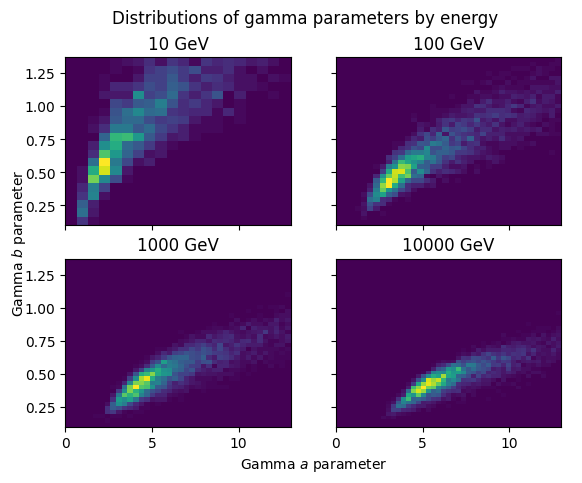

In [8]:
xmin,xmax,ymin,ymax = 0,13,0.1,1.37
particle = 'ALL'
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)
axs[0,0].hist2d(gamma_a_dct_ns[particle][10], gamma_b_dct_ns[particle][10],bins=20,range=[[xmin,xmax],[ymin,ymax]])
axs[0,0].set_title('10 GeV')
axs[0,1].hist2d(gamma_a_dct_ns[particle][100], gamma_b_dct_ns[particle][100],bins=36,range=[[xmin,xmax],[ymin,ymax]])
axs[0,1].set_title('100 GeV')
axs[1,0].hist2d(gamma_a_dct_ns[particle][1000], gamma_b_dct_ns[particle][1000],bins=40,range=[[xmin,xmax],[ymin,ymax]])
axs[1,0].set_title('1000 GeV')
axs[1,1].hist2d(gamma_a_dct_ns[particle][10000], gamma_b_dct_ns[particle][10000],bins=45,range=[[xmin,xmax],[ymin,ymax]])
axs[1,1].set_title('10000 GeV')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Gamma $a$ parameter")
plt.ylabel("Gamma $b$ parameter")
fig.suptitle('Distributions of gamma parameters by energy')
plt.show()

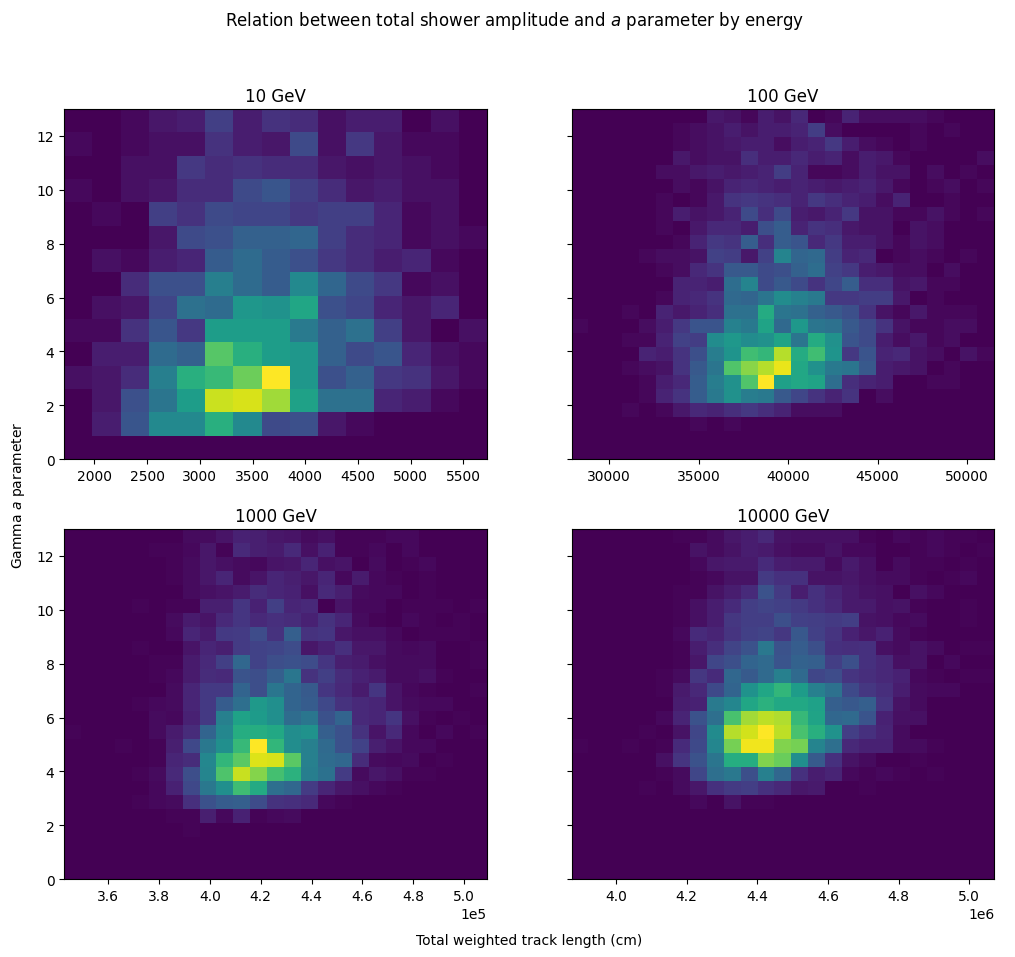

In [31]:
ymin,ymax = 0,13
particle = 'ALL'
fig, axs = plt.subplots(2,2,sharex=False,sharey=True)
axs[0,0].hist2d(ltot_dct_ns[particle][10], gamma_a_dct_ns[particle][10], bins=15, range = 
                [[np.min(ltot_dct_ns[particle][10]),np.max(ltot_dct_ns[particle][10])],[ymin,ymax]])
axs[0,0].set_title('10 GeV')
axs[0,1].hist2d(ltot_dct_ns[particle][100], gamma_a_dct_ns[particle][100], bins=25, range =
               [[np.min(ltot_dct_ns[particle][100]),np.max(ltot_dct_ns[particle][100])],[ymin,ymax]])
axs[0,1].set_title('100 GeV')
axs[1,0].hist2d(ltot_dct_ns[particle][1000], gamma_a_dct_ns[particle][1000], bins=25, range = 
                [[np.min(ltot_dct_ns[particle][1000]),np.max(ltot_dct_ns[particle][1000])],[ymin,ymax]])
axs[1,0].set_title('1000 GeV')
axs[1,1].hist2d(ltot_dct_ns[particle][10000], gamma_a_dct_ns[particle][10000],bins=25, range = 
               [[np.min(ltot_dct_ns[particle][10000]),np.max(ltot_dct_ns[particle][10000])],[ymin,ymax]])
axs[1,1].set_title('10000 GeV')
axs[1,0].ticklabel_format(axis='x',style='sci',scilimits=(0,0))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
fig.set_size_inches(12, 10)
plt.xlabel("Total weighted track length (cm)")
ax = plt.gca()
ax.xaxis.set_label_coords(0.5,-.07)
plt.ylabel("Gamma $a$ parameter")
fig.suptitle('Relation between total shower amplitude and $a$ parameter by energy')
plt.show()

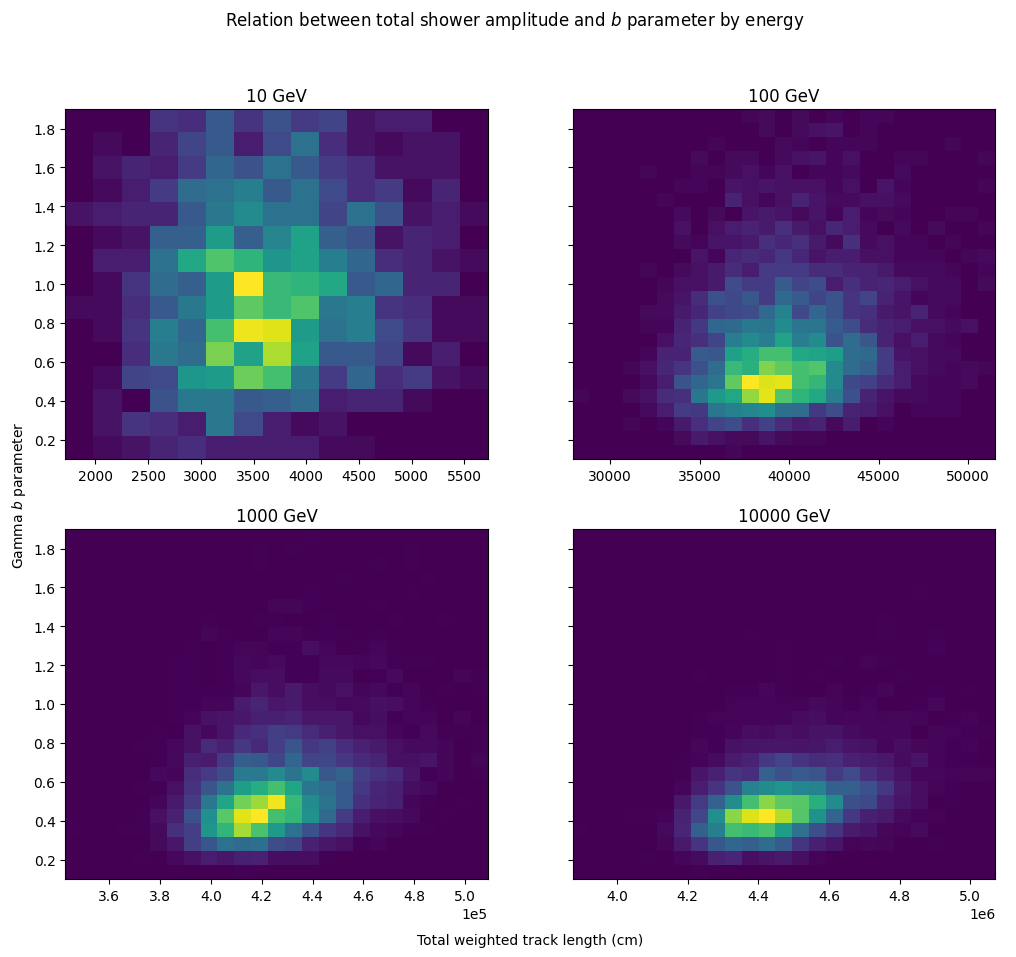

In [32]:
ymin,ymax = 0.1,1.9
particle = 'ALL'
fig, axs = plt.subplots(2,2,sharex=False,sharey=True)
axs[0,0].hist2d(ltot_dct_ns[particle][10], gamma_b_dct_ns[particle][10], bins=15, range = 
                [[np.min(ltot_dct_ns[particle][10]),np.max(ltot_dct_ns[particle][10])],[ymin,ymax]])
axs[0,0].set_title('10 GeV')
axs[0,1].hist2d(ltot_dct_ns[particle][100], gamma_b_dct_ns[particle][100], bins=25, range =
               [[np.min(ltot_dct_ns[particle][100]),np.max(ltot_dct_ns[particle][100])],[ymin,ymax]])
axs[0,1].set_title('100 GeV')
axs[1,0].hist2d(ltot_dct_ns[particle][1000], gamma_b_dct_ns[particle][1000], bins=25, range = 
                [[np.min(ltot_dct_ns[particle][1000]),np.max(ltot_dct_ns[particle][1000])],[ymin,ymax]])
axs[1,0].set_title('1000 GeV')
axs[1,1].hist2d(ltot_dct_ns[particle][10000], gamma_b_dct_ns[particle][10000],bins=25, range = 
               [[np.min(ltot_dct_ns[particle][10000]),np.max(ltot_dct_ns[particle][10000])],[ymin,ymax]])
axs[1,1].set_title('10000 GeV')
axs[1,0].ticklabel_format(axis='x',style='sci',scilimits=(0,0))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
fig.set_size_inches(12, 10)
plt.xlabel("Total weighted track length (cm)")
ax = plt.gca()
ax.xaxis.set_label_coords(0.5,-.07)
plt.ylabel("Gamma $b$ parameter")
fig.suptitle('Relation between total shower amplitude and $b$ parameter by energy')
plt.show()

                   $a$       $b$  $\ell_{tot}$
$a$           1.000000  0.878494      0.065747
$b$           0.878494  1.000000     -0.012819
$\ell_{tot}$  0.065747 -0.012819      1.000000
                   $a$       $b$  $\ell_{tot}$
$a$           1.000000  0.892532      0.128959
$b$           0.892532  1.000000      0.195848
$\ell_{tot}$  0.128959  0.195848      1.000000
                   $a$       $b$  $\ell_{tot}$
$a$           1.000000  0.899867      0.146398
$b$           0.899867  1.000000      0.293968
$\ell_{tot}$  0.146398  0.293968      1.000000
                   $a$       $b$  $\ell_{tot}$
$a$           1.000000  0.883396      0.197002
$b$           0.883396  1.000000      0.375248
$\ell_{tot}$  0.197002  0.375248      1.000000


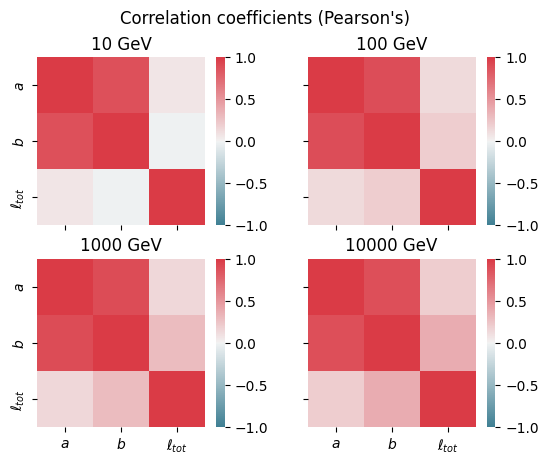

In [68]:
particle = 'ALL'
energy_mat = np.array([[10,100],[1000,10000]])
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)
energy=10000
for i in range(2):
    for j in range(2):
        dfparams = pd.DataFrame(data=np.array([gamma_a_dct_ns[particle][energy_mat[i,j]],gamma_b_dct_ns[particle][energy_mat[i,j]],
                         ltot_dct_ns[particle][energy_mat[i,j]]]).T,
                       columns=['$a$', '$b$', '$\ell_{tot}$'])
        corr = dfparams.corr()
        print(corr)
        sns.heatmap(corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            square=True, ax=axs[i,j])
        axs[i,j].set_title(str(energy_mat[i,j]) + ' GeV')
fig.suptitle('Correlation coefficients (Pearson\'s)')
plt.show()

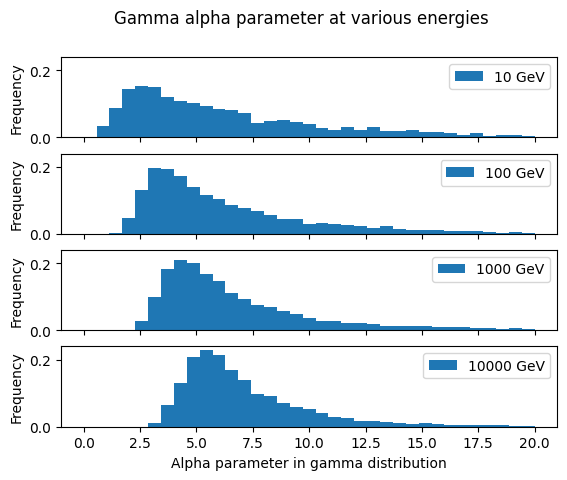

In [15]:
fig, axs = plt.subplots(4,sharex=True,sharey=True)
particle = 'ALL'
crop = 20

num_bins=35
axs[0].hist(gamma_a_dct_ns[particle][10],bins=num_bins, label='10 GeV', range=(0,crop), density=True)
axs[1].hist(gamma_a_dct_ns[particle][100],bins=num_bins, label='100 GeV', range=(0,crop), density=True)
axs[2].hist(gamma_a_dct_ns[particle][1000],bins=num_bins, label='1000 GeV', range=(0,crop), density=True)
axs[3].hist(gamma_a_dct_ns[particle][10000],bins=num_bins, label='10000 GeV', range=(0,crop), density=True)
for ax in axs:
    ax.set_ylabel('Frequency')
    ax.legend()
axs[-1].set_xlabel('Alpha parameter in gamma distribution')
fig.suptitle('Gamma alpha parameter at various energies')
plt.show()

(array([9.57118973e-01, 2.10405013e-02, 7.61039408e-03, 2.68602144e-03,
        2.23835120e-03, 8.95340480e-04, 1.34301072e-03, 0.00000000e+00,
        4.47670240e-04, 4.47670240e-04, 4.47670240e-04, 0.00000000e+00,
        4.47670240e-04, 4.47670240e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.47670240e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.47670240e-04]),
 array([4.92281329e-04, 1.00444153e+00, 2.00839078e+00, 3.01234004e+00,
        4.01628929e+00, 5.02023854e+00, 6.02418779e+00, 7.02813704e+00,
        8.03208629e+00, 9.03603555e+00, 1.00399848e+01, 1.10439340e+01,
        1.20478833e+01, 1.30518326e+01, 1.40557818e+01, 1.50597311e+01,
        1.60636803e+01, 1.70676296e+01, 1.80715788e+01, 1.90755281e+01,
        2.00794773e+01, 2.10834266e+01, 2.20873758e+01, 2.30913251e+01,
        2.40952743e+01

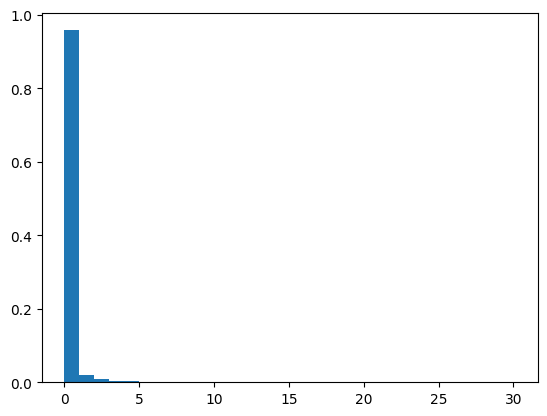

In [117]:
plt.hist([gamma_cov_dct_ns[particle][10][i][0,0] for i in range(len(dct_ns[particle][10]))],bins=30, label='10 GeV', density=True)

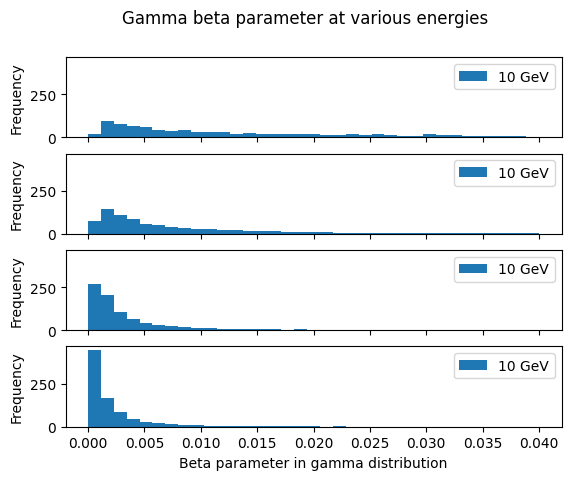

In [116]:
fig, axs = plt.subplots(4,sharex=True,sharey=True)
particle = 'ALL'
crop = 0.04
num_bins=35
axs[0].hist([gamma_cov_dct_ns[particle][10][i][0,0] for i in range(len(dct_ns[particle][10]))],bins=num_bins, label='10 GeV', range=(0,crop), density=True)
axs[1].hist([gamma_cov_dct_ns[particle][100][i][0,0] for i in range(len(dct_ns[particle][100]))],bins=num_bins, label='10 GeV', range=(0,crop), density=True)
axs[2].hist([gamma_cov_dct_ns[particle][1000][i][0,0] for i in range(len(dct_ns[particle][1000]))],bins=num_bins, label='10 GeV', range=(0,crop), density=True)
axs[3].hist([gamma_cov_dct_ns[particle][10000][i][0,0] for i in range(len(dct_ns[particle][10000]))],bins=num_bins, label='10 GeV', range=(0,crop), density=True)
for ax in axs:
    ax.set_ylabel('Frequency')
    ax.legend()
axs[-1].set_xlabel('Beta parameter in gamma distribution')
fig.suptitle('Gamma beta parameter at various energies')
plt.show()

In [124]:
energy = 100
l = np.array([gamma_cov_dct_ns[particle][energy][i][0,0] for i in range(len(dct_ns[particle][energy]))])
bad_indices = (l > 3).nonzero()[0]
bad_indices

array([1796])

In [37]:
i = {}
j = {}
for energy in energies:
    i[energy] = len(gamma_a_dct_ns['ALL'][energy][gamma_a_dct_ns['ALL'][energy] > 30])
    j[energy] = len(gamma_a_dct_ns['ALL'][energy])
    print(energy,i[energy],i[energy]*100/j[energy])

10 88 3.955056179775281
30 93 3.012633624878523
70 76 1.9843342036553524
100 55 1.3414634146341464
300 46 0.9364820846905537
700 33 0.6302521008403361
1000 26 0.4833612195575386
3000 26 0.4614838480653177
7000 17 0.29442327675788016
10000 9 0.1549053356282272


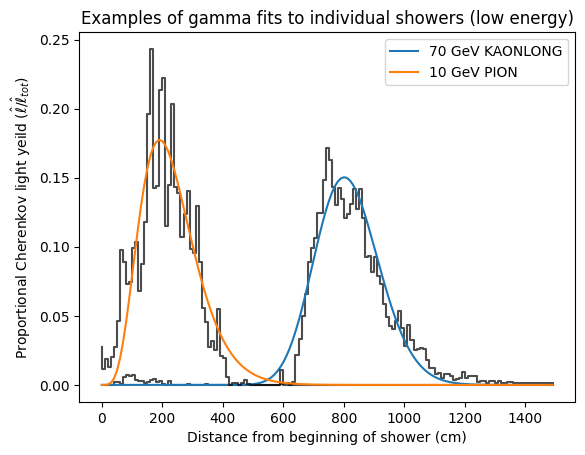

In [63]:
bad_indices = np.array(df_ns.gamma_a > 40).nonzero()[0]
crop = 150
L_rad = 39.7
xvals = np.arange(0,500) * 10
bin_size = 10/L_rad
for i in [bad_indices[120],20]:
    lnorm = df_ns.iloc[i][:500] / (bin_size * df_ns.ltot[i])
    plt.step(xvals[:crop],lnorm[:crop],color='black',alpha=0.70)
    plt.plot(xvals[:crop],myGamma(xvals/L_rad,df_ns.gamma_a[i],df_ns.gamma_b[i])[:crop],
             label=str(df_ns.energy[i])+' GeV ' + df_ns.particle_type[i])
# i = 50
# plt.plot(xvals[:crop],df_ns.iloc[i][:crop] / (bin_size * df_ns.ltot[i]))
# plt.plot(xvals[:crop],myGamma(xvals,df_ns.gamma_a[i],df_ns.gamma_b[i])[:crop])
# plt.legend()
plt.title('Examples of gamma fits to individual showers (low energy)')
plt.xlabel('Distance from beginning of shower (cm)')
plt.ylabel('Proportional Cherenkov light yeild ($\hat{\ell}/\hat{\ell}_{tot}$)')
# plt.yscale('log')
plt.legend()
plt.show()

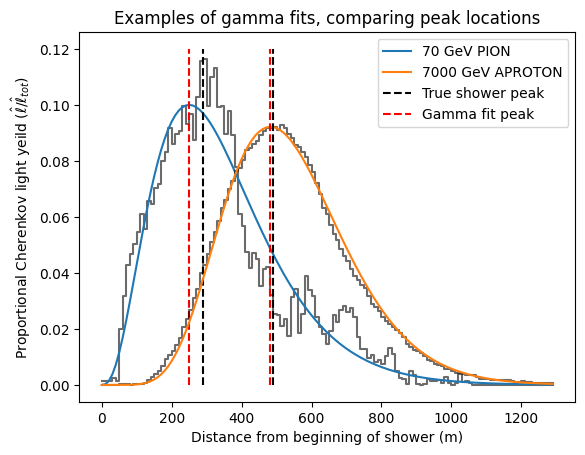

In [168]:
crop = 130
L_rad = 39.7
xvals = np.arange(0,500) * 10
bin_size = 10/L_rad
for i in [1100,36646]:
    lnorm = df_ns.iloc[i][:500] / (bin_size * df_ns.ltot[i])
    plt.step(xvals[:crop],lnorm[:crop],color='black',alpha=0.580)
    plt.plot(xvals[:crop],myGamma(xvals/L_rad,df_ns.gamma_a[i],df_ns.gamma_b[i])[:crop],
             label=str(df_ns.energy[i])+' GeV ' + df_ns.particle_type[i])
    plt.vlines(df_ns.peak_loc[i]*L_rad,0,0.12,linestyles='--',color='black')
    plt.vlines((df_ns.gamma_a[i] - 1)*L_rad/df_ns.gamma_b[i],0,0.12,linestyles='--',color='red')
plt.xlabel('Distance from beginning of shower (m)')
plt.ylabel('Proportional Cherenkov light yeild ($\hat{\ell}/\hat{\ell}_{tot}$)')
plt.title('Examples of gamma fits, comparing peak locations')

handles, labels = plt.gca().get_legend_handles_labels()
# create manual symbols for legend
legend_peak_true = mpl.lines.Line2D([0], [0], label='True shower peak', color='black',linestyle='--')
legend_peak_fit = mpl.lines.Line2D([0], [0], label='Gamma fit peak', color='red',linestyle='--')
# add manual symbols to auto legend
handles.extend([legend_peak_true, legend_peak_fit])
plt.legend(handles=handles)
plt.show()

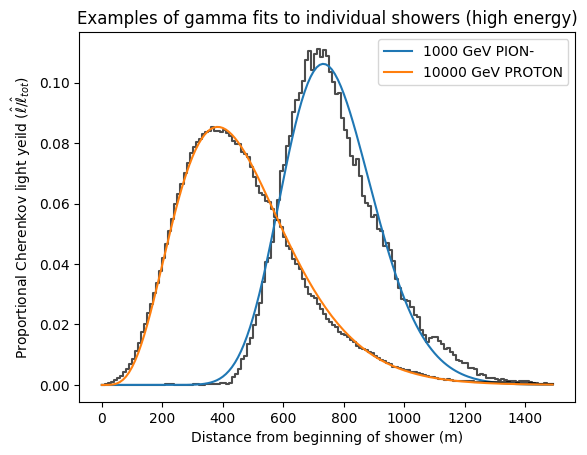

In [62]:
bad_indices = np.array(df_ns.gamma_a > 40).nonzero()[0]
crop = 150
L_rad = 39.7
xvals = np.arange(0,500) * 10
bin_size = 10/L_rad
for i in [12000,30000]:
    lnorm = df_ns.iloc[i][:500] / (bin_size * df_ns.ltot[i])
    plt.step(xvals[:crop],lnorm[:crop],color='black',alpha=0.70)
    plt.plot(xvals[:crop],myGamma(xvals/L_rad,df_ns.gamma_a[i],df_ns.gamma_b[i])[:crop],
             label=str(df_ns.energy[i])+' GeV ' + df_ns.particle_type[i])
    vlines(
# i = 50
# plt.plot(xvals[:crop],df_ns.iloc[i][:crop] / (bin_size * df_ns.ltot[i]))
# plt.plot(xvals[:crop],myGamma(xvals,df_ns.gamma_a[i],df_ns.gamma_b[i])[:crop])
# plt.legend()
plt.xlabel('Distance from beginning of shower (m)')
plt.ylabel('Proportional Cherenkov light yeild ($\hat{\ell}/\hat{\ell}_{tot}$)')
# plt.yscale('log')
plt.title('Examples of gamma fits to individual showers (high energy)')
plt.legend()
plt.show()

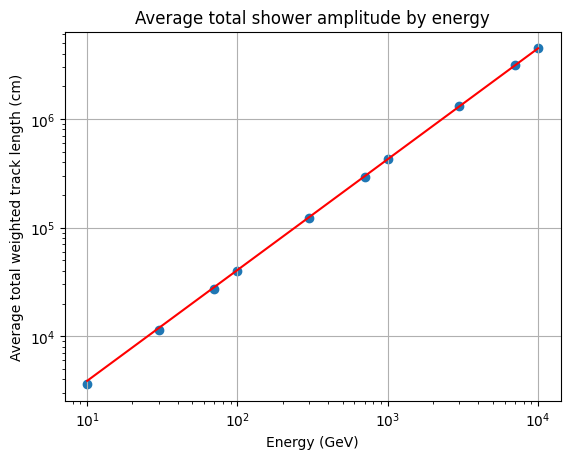

In [34]:
particle = 'ALL'
ltots = []
for energy in energies:
    ltots.append(np.mean(ltot_dct_ns[particle][energy]))
plt.scatter(energies,np.array(ltots))
popt, pcov = sc.optimize.curve_fit(lambda x,a,b: (a*(x**b)),energies,ltots,p0=(280,1))
xvals = np.logspace(1,4,500)
plt.plot(xvals, popt[0]*(xvals**popt[1]),color='red',label='Single power law fit')
plt.xlabel('Energy (GeV)')
plt.ylabel('Average total weighted track length (cm)')
plt.title('Average total shower amplitude by energy')
plt.legend
plt.grid(visible=True)
plt.yscale('log')
plt.xscale('log')

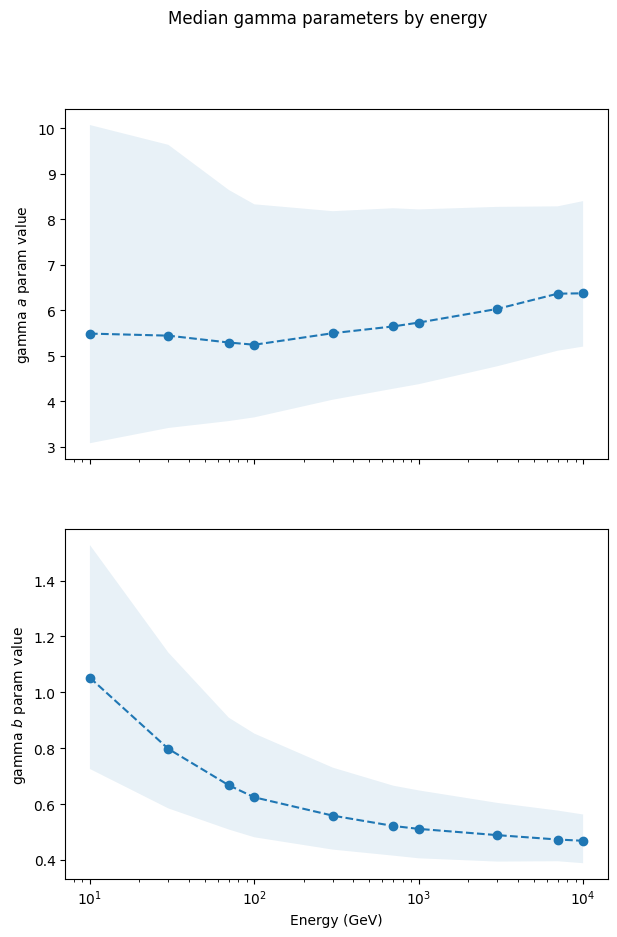

In [60]:
particle = 'ALL'
gamma_as = np.zeros(len(energies))
gamma_aup = np.zeros(len(energies))
gamma_alow = np.zeros(len(energies))
gamma_bs = np.zeros(len(energies))
gamma_bup = np.zeros(len(energies))
gamma_blow = np.zeros(len(energies))
for j, energy in enumerate(energies):
    gamma_as[j] = np.median(gamma_a_dct_ns[particle][energy])
    gamma_aup[j] = np.quantile(gamma_a_dct_ns[particle][energy],0.75)
    gamma_alow[j] = np.quantile(gamma_a_dct_ns[particle][energy],0.25)
    gamma_bs[j] = np.median(gamma_b_dct_ns[particle][energy])
    gamma_bup[j] = np.quantile(gamma_b_dct_ns[particle][energy],0.75)
    gamma_blow[j] = np.quantile(gamma_b_dct_ns[particle][energy],0.25)
fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(energies,gamma_as,'o--',label='gamma $a$')
axs[0].fill_between(energies,gamma_alow,gamma_aup,alpha=0.1)
axs[0].set_ylabel('gamma $a$ param value')
axs[1].plot(energies,np.array(gamma_bs),'o--',label='gamma $b$')
axs[1].fill_between(energies,gamma_blow,gamma_bup,alpha=0.1)
axs[1].set_ylabel('gamma $b$ param value')
fig.suptitle('Median gamma parameters by energy')
fig.set_size_inches(7,10)
axs[-1].set_xlabel('Energy (GeV)')
plt.xscale('log')

In [20]:
np.sum(dct_ns['ALL'][1000], axis=2)

array([[0.04170545],
       [0.0401619 ],
       [0.04328409],
       ...,
       [0.04173254],
       [0.04487962],
       [0.0452226 ]])

In [22]:
ltot_dct_ns['ALL'][1000]

array([0.04170545, 0.0401619 , 0.04328409, ..., 0.04173254, 0.04487962,
       0.0452226 ])

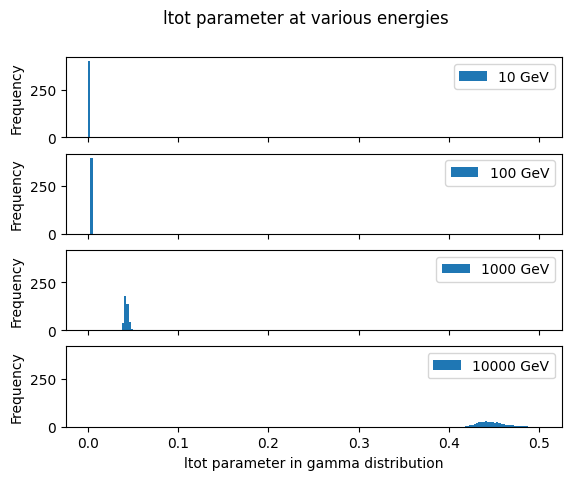

In [27]:
fig, axs = plt.subplots(4,sharex=True,sharey=True)
particle = 'ALL'
crop = 0.5

num_bins=200
axs[0].hist(ltot_dct_ns[particle][10],bins=num_bins, label='10 GeV', range=(0,crop), density=True)
axs[1].hist(ltot_dct_ns[particle][100],bins=num_bins, label='100 GeV', range=(0,crop), density=True)
axs[2].hist(ltot_dct_ns[particle][1000],bins=num_bins, label='1000 GeV', range=(0,crop), density=True)
axs[3].hist(ltot_dct_ns[particle][10000],bins=num_bins, label='10000 GeV', range=(0,crop), density=True)
for ax in axs:
    ax.set_ylabel('Frequency')
    ax.legend()
axs[-1].set_xlabel('ltot parameter in gamma distribution')
fig.suptitle('ltot parameter at various energies')
plt.show()

In [28]:
particle = 'ALL'
ltot_std = []
ltot_std_norm = []
for energy in energies:
    ltot_std.append(np.std(ltot_dct_ns[particle][energy]))
    ltot_std_norm.append(np.std(ltot_dct_ns[particle][energy])/np.mean(ltot_dct_ns[particle][energy]))
    print(ltot_std_norm[-1])

0.19139346200479013
0.11926868599191667
0.09031255773295835
0.08219801527836029
0.0618669637143937
0.0520114841316475
0.048542077470218915
0.039987097837705446
0.03493474387108745
0.032598748554868114


In [64]:
popt

array([9.05933396e-06, 7.94293701e-01])

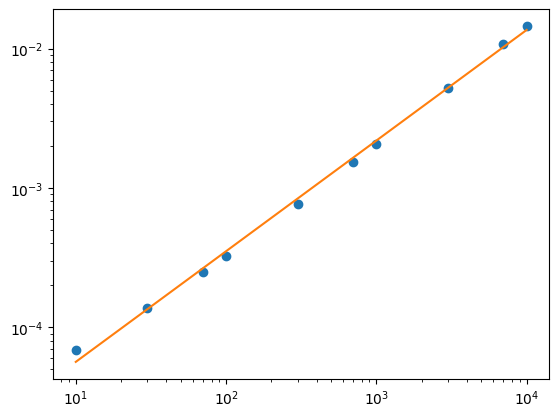

In [63]:
plt.plot(energies,ltot_std,'o')
popt,_ = sc.optimize.curve_fit(lambda x,a,b: a*(x**b), energies,ltot_std,sigma=np.sqrt(energies)**1.5,p0=(1e-3,0.3))
plt.plot(energies, popt[0] * (energies**popt[1]))
plt.xscale('log')
plt.yscale('log')

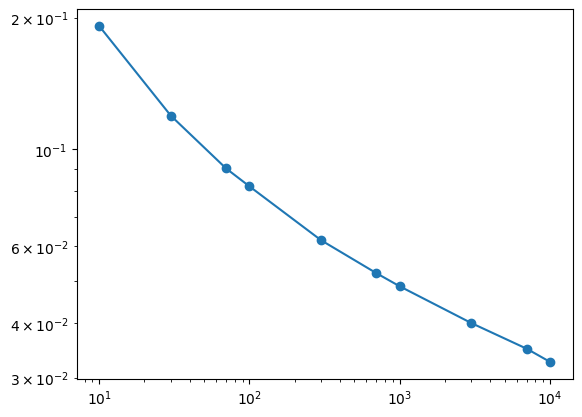

In [25]:
plt.plot(energies,ltot_std_norm,'o')
plt.xscale('log')
plt.yscale('log')

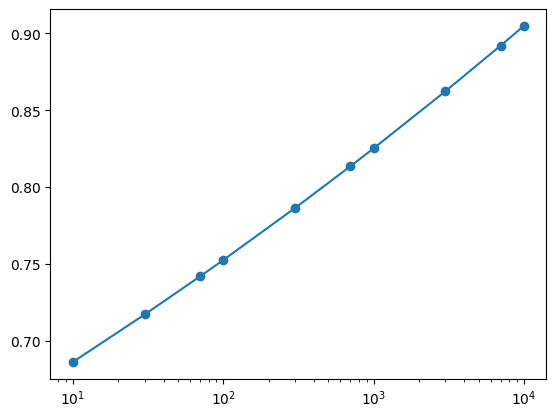

In [82]:

plt.plot(energies,(333/532)*(energies**0.04),'-o')
plt.xscale('log')
plt.yscale('linear')

(0.0, 1.0)

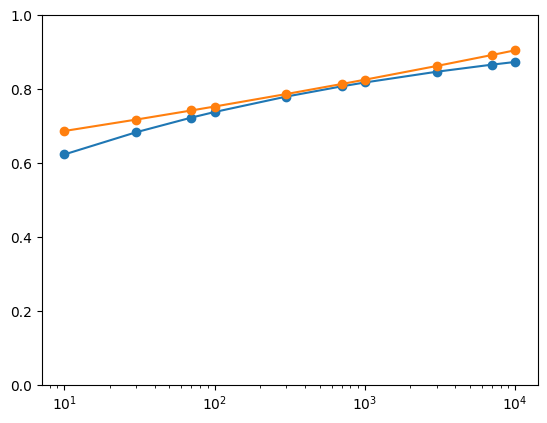

In [86]:
m=0.1578
f_0 = 0.27273
E_s = 0.1559

plt.plot(energies,1-(1-f_0)*(energies/E_s)**-m,'-o')
plt.plot(energies,(333/532)*(energies**0.04),'-o')
plt.xscale('log')
plt.yscale('linear')
plt.ylim(0,1)


In [95]:
peak_gamma_dct = {}
for particle in particle_types + ['ALL']:
    peak_gamma_dct[particle] = {}
    for energy in energies:
        peak_gamma_dct[particle][energy] = (gamma_a_dct_ns[particle][energy] - 1)/gamma_b_dct_ns[particle][energy]

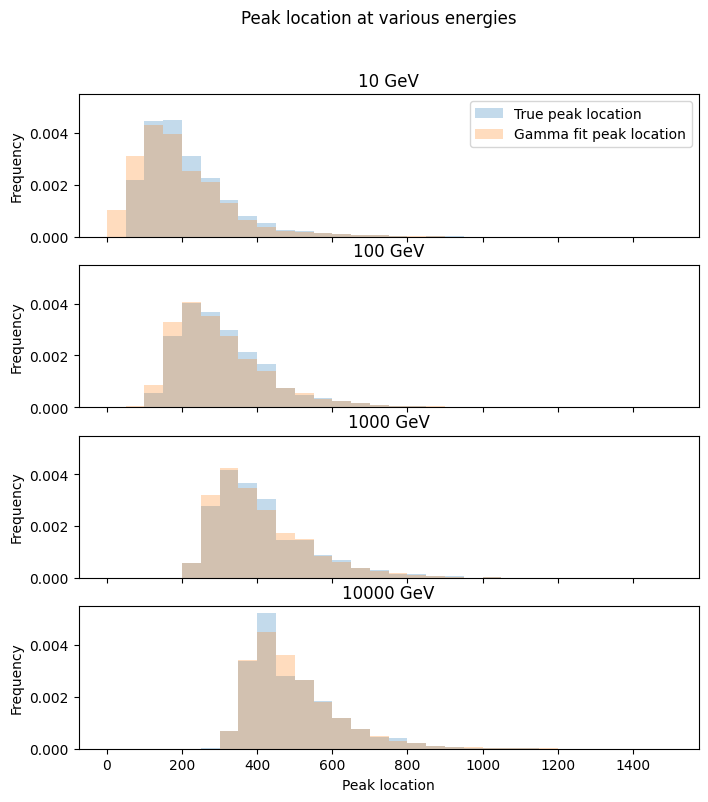

In [121]:
fig, axs = plt.subplots(4,sharex=True,sharey=True)
particle = 'ALL'
crop = 1500
alpha = 0.265
num_bins=30
scale = 39.7
for j,energy in enumerate([10,100,1000,10000]):
    axs[j].hist(scale*peak_loc_dct_ns[particle][energy],bins=num_bins, label='True peak location', range=(0,crop), density=True,alpha=alpha)
    axs[j].hist(scale*peak_gamma_dct[particle][energy],bins=num_bins, label='Gamma fit peak location', range=(0,crop), density=True,alpha=alpha)
    axs[j].set_ylabel('Frequency')
    axs[j].set_title(str(energy) + ' GeV')
# axs[0].hist(scale*peak_loc_dct_ns[particle][10],bins=num_bins, label='10 GeV', range=(0,crop), density=True,alpha=alpha)
# axs[1].hist(scale*peak_loc_dct_ns[particle][100],bins=num_bins, label='100 GeV', range=(0,crop), density=True,alpha=alpha)
# axs[2].hist(scale*peak_loc_dct_ns[particle][1000],bins=num_bins, label='1000 GeV', range=(0,crop), density=True,alpha=alpha)
# axs[3].hist(scale*peak_loc_dct_ns[particle][10000],bins=num_bins, label='10000 GeV', range=(0,crop), density=True,alpha=alpha)
# axs[0].hist(scale*peak_gamma_dct[particle][10],bins=num_bins, label='10 GeV', range=(0,crop), density=True,alpha=alpha)
# axs[1].hist(scale*peak_gamma_dct[particle][100],bins=num_bins, label='100 GeV', range=(0,crop), density=True,alpha=alpha)
# axs[2].hist(scale*peak_gamma_dct[particle][1000],bins=num_bins, label='1000 GeV', range=(0,crop), density=True,alpha=alpha)
# axs[3].hist(scale*peak_gamma_dct[particle][10000],bins=num_bins, label='10000 GeV', range=(0,crop), density=True,alpha=alpha)

axs[0].legend()
axs[-1].set_xlabel('Peak location')
fig.set_size_inches(8,8.5)
fig.suptitle('Peak location at various energies')
plt.show()

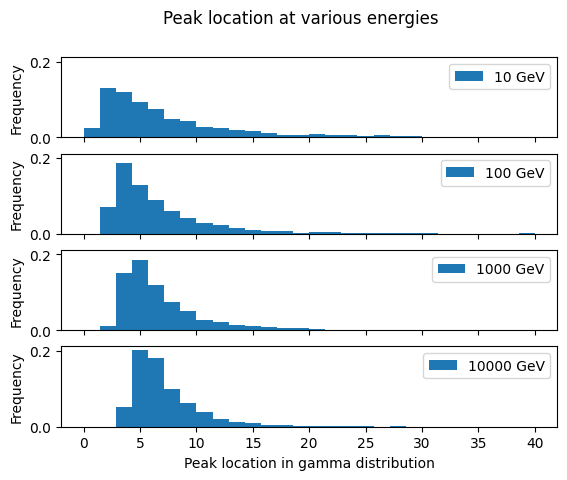

In [83]:
fig, axs = plt.subplots(4,sharex=True,sharey=True)
particle = 'ALL'
start = 0
crop = 40

num_bins=28
axs[0].hist(gamma_a_dct_ns[particle][10],bins=num_bins, label='10 GeV', range=(start,crop), density=True)
axs[1].hist(gamma_a_dct_ns[particle][100],bins=num_bins, label='100 GeV', range=(start,crop), density=True)
axs[2].hist(gamma_a_dct_ns[particle][1000],bins=num_bins, label='1000 GeV', range=(start,crop), density=True)
axs[3].hist(gamma_a_dct_ns[particle][10000],bins=num_bins, label='10000 GeV', range=(start,crop), density=True)
for ax in axs:
    ax.set_ylabel('Frequency')
    ax.legend()
axs[-1].set_xlabel('Peak location in gamma distribution')
fig.suptitle('Peak location at various energies')
plt.show()

1126


2471
1.0717271274309093
2471


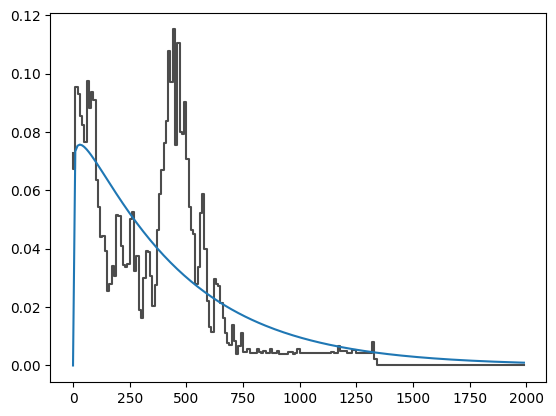

In [157]:
energy = 30
particle = 'ALL'
for i in range(len(gamma_a_dct_ns[particle][energy])):
    if gamma_a_dct_ns[particle][energy][i] <= 1.1:
        print(i)
        print(gamma_a_dct_ns[particle][energy][i])
        break
print(i)
crop = 200
L_rad = 39.7
xvals = np.arange(0,500) * 10
bin_size = 10/L_rad
lnorm = dct_ns[particle][energy][i,0,:] / (bin_size * ltot_dct_ns[particle][energy][i]/10e6)
plt.step(xvals[:crop],lnorm[:crop],color='black',alpha=0.70)
plt.plot(xvals[:crop],myGamma(xvals/L_rad,gamma_a_dct_ns[particle][energy][i],gamma_b_dct_ns[particle][energy][i])[:crop])

In [135]:
np.sum(lnorm)
print(np.sum(dct_ns[particle][energy][i,0,:]))
print(ltot_dct_ns[particle][energy][7])

0.0010478315010729999
12290.720529999999


In [139]:
particle = 'ALL'
for energy in energies:
    print(energy,np.min(gamma_a_dct_ns[particle][energy]),np.max(gamma_a_dct_ns[particle][energy]))

10 1.00000000191311 100.39736535136794
30 1.0717271274309093 159.62824616984577
70 1.3367923859857014 102.44939616643364
100 1.3489903108760453 177.68173823087426
300 1.893447770805892 93.0222297986827
700 2.0838676254805506 64.00966782867518
1000 1.8923414821081728 55.828456618097405
3000 2.5115422663460616 57.42845798310571
7000 2.545826186348347 50.90210161356252
10000 2.709987011566898 44.21736799842894


In [77]:
gamma_a_dct_cropped  = {}
split = 50
for particle in particle_types + ['ALL']:
    gamma_a_dct_cropped[particle] = {}
    for energy in energies:
        data = gamma_a_dct_ns[particle][energy]
        split = 80
        gamma_a_dct_cropped[particle][energy] = data[data<=split]
        if particle == 'ALL':
            print(energy,data[data > split].size/data.size)

10 0.2498876404494382
30 0.25008098477486235
70 0.25013054830287207
100 0.25
300 0.25
700 0.25
1000 0.25004647704034205
3000 0.25008874689385874
7000 0.25008659508139935
10000 0.2500860585197935


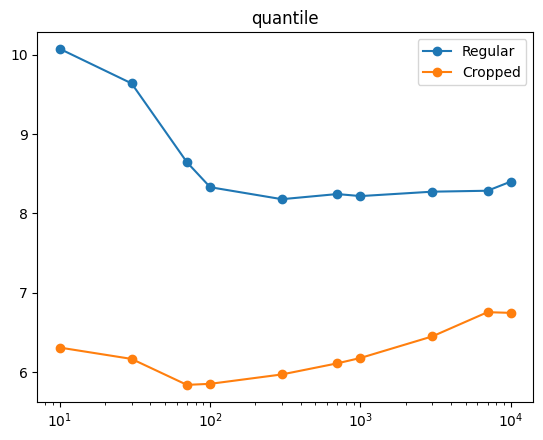

In [78]:
particle = 'ALL'
means = np.zeros(len(energies))
means_cropped = np.zeros(len(energies))
for i,energy in enumerate(energies):
    means[i] = np.quantile(gamma_a_dct_ns[particle][energy],.75)
    means_cropped[i] = np.quantile(gamma_a_dct_cropped[particle][energy],.75)
plt.plot(energies,means,'o-',label='Regular')
plt.plot(energies,means_cropped,'o-',label='Cropped')
plt.legend()
plt.title('quantile')
plt.xscale('log')

In [73]:
np.mean(gamma_a_dct_ns[particle][30]),means[1]

(8.258090595022376, 8.258090595022376)

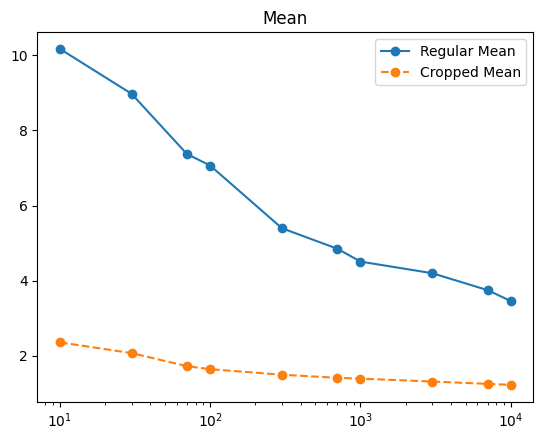

In [103]:
particle = 'ALL'
means = np.zeros(len(energies))
means_cropped = np.zeros(len(energies))
medians = np.zeros(len(energies))
medians_cropped = np.zeros(len(energies))
for i,energy in enumerate(energies):
    means[i] = np.std(gamma_a_dct_ns[particle][energy])
    means_cropped[i] = np.std(gamma_a_dct_cropped[particle][energy])
    medians[i] = np.median(gamma_a_dct_ns[particle][energy])
    medians_cropped[i] = np.median(gamma_a_dct_cropped[particle][energy])
plt.plot(energies,means,'o-',label='Regular Mean')
# plt.plot(energies,medians,'o-',label='Regular Median')
plt.plot(energies,means_cropped,'o--',label='Cropped Mean')
# plt.plot(energies,medians_cropped,'o--',label='Cropped Median')
plt.legend()
plt.title('Mean')
plt.xscale('log')

In [77]:
####PCA
particle = 'ALL'
X = {}
Z = {}
cov_mat = {}
D = {}
P = {}
Z_new = {}
for energy in energies:
    X[energy] = np.array([gamma_a_dct_ns[particle][energy],gamma_b_dct_ns[particle][energy],ltot_dct_ns[particle][energy]]).T
    Z[energy] = (X[energy] - np.mean(X[energy],0))/np.std(X[energy],0)
    cov_mat[energy] = Z[energy].T @ Z[energy]
    eigvals, eigvecs = np.linalg.eig(cov_mat[energy])
    P[energy] = np.array([eigvec for eigval,eigvec in sorted(zip(eigvals, eigvecs.T))]).T
    D[energy] = np.diag(sorted(eigvals))
    Z_new[energy] = Z[energy]@P[energy][:,1:]

In [82]:
en = 30
X[en]

array([[2.66218575e+00, 5.93460089e-01, 1.06063681e+04],
       [9.83596937e+00, 1.19358701e+00, 1.06264051e+04],
       [4.19073009e+00, 7.66155819e-01, 1.35678662e+04],
       ...,
       [5.95131934e+00, 9.50880305e-01, 1.30554181e+04],
       [9.08482291e+00, 9.48209379e-01, 1.02369329e+04],
       [3.60644449e+00, 7.48060624e-01, 1.04548703e+04]])

In [83]:
X_proj = {}
for en in energies:
    X_proj[en] = (Z[en]@(P[en][:,1:])@(P[en][:,1:].T) * np.std(X[en],0)) + np.mean(X[en],0)

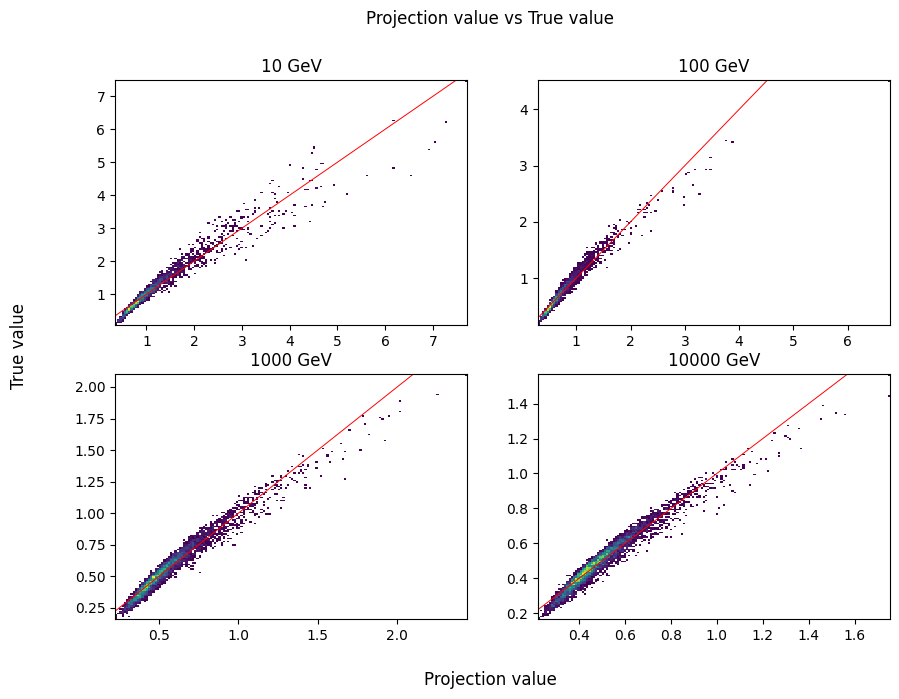

In [144]:
en_mat = np.array([[10,100],[1000,10000]])
feat = 1
fig, axs = plt.subplots(2,2,sharex=False,sharey=False)
for i in range(2):
    for j in range(2):
        en = en_mat[i,j]
        data,_,_,_ = axs[i,j].hist2d(X_proj[en][:,feat],X[en][:,feat],cmin=1,bins=160)
        xvals = np.linspace(np.min(X_proj[en][:,feat]),np.max(X_proj[en][:,feat]))
        axs[i,j].plot(xvals,xvals,color='red',linewidth=.7)
        axs[i,j].set_title(str(en) + ' GeV')
# plt.xlim(xvals[0],xvals[-1])
# plt.ylim(xvals[0],xvals[-1])
fig.set_size_inches(10,7)
fig.suptitle('Projection value vs True value')
fig.supxlabel('Projection value')
fig.supylabel('True value')
plt.show()

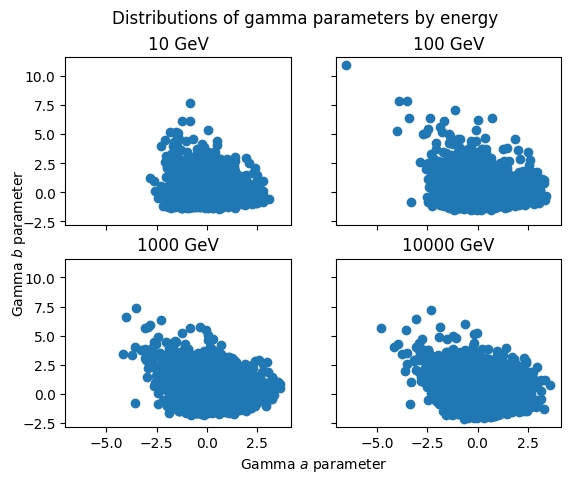

In [54]:
particle = 'ALL'
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)
axs[0,0].scatter(X_new[10][:,0], Z[10][:,1])
axs[0,0].set_title('10 GeV')
axs[0,1].scatter(X_new[100][:,0], Z[100][:,1])
axs[0,1].set_title('100 GeV')
axs[1,0].scatter(X_new[1000][:,0], Z[1000][:,1])
axs[1,0].set_title('1000 GeV')
axs[1,1].scatter(X_new[10000][:,0], Z[10000][:,1])
axs[1,1].set_title('10000 GeV')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Gamma $a$ parameter")
plt.ylabel("Gamma $b$ parameter")
fig.suptitle('Distributions of gamma parameters by energy')
plt.show()

In [11]:
en = 1000
abar = np.mean(Z[en][:,0])
bbar = np.mean(Z[en][:,1])
np.mean((Z[en][:,0] - abar)*(Z[en][:,1]-bbar))

0.8998665574795098

In [12]:
en = 700
abar = np.mean(X_new[en][:,0])
bbar = np.mean(X_new[en][:,1])
np.mean((X_new[en][:,0] - abar)*(X_new[en][:,1]-bbar))

1.085626792605195e-17

In [14]:
eigvals/np.sum(eigvals)

array([0.941698, 0.058302])

In [52]:
for energy in energies:
    print(np.diagonal(D[energy])/np.sum(np.diagonal(D[energy])))

[0.03933465 0.33396922 0.62669613]
[0.03512469 0.31984733 0.64502798]
[0.02915177 0.32153805 0.64931018]
[0.03496109 0.31562776 0.64941115]
[0.02756142 0.30366245 0.66877613]
[0.03238839 0.30560741 0.6620042 ]
[0.02915279 0.3049736  0.66587361]
[0.03069517 0.30329663 0.6660082 ]
[0.03075988 0.28861185 0.68062827]
[0.03234128 0.28705411 0.68060461]


In [ ]:
particle = 'ALL'
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)
axs[0,0].scatter(Z[10][:,0], Z[10][:,1])
axs[0,0].set_title('10 GeV')
axs[0,1].scatter(Z[100][:,0], Z[100][:,1])
axs[0,1].set_title('100 GeV')
axs[1,0].scatter(Z[1000][:,0], Z[1000][:,1])
axs[1,0].set_title('1000 GeV')
axs[1,1].scatter(Z[10000][:,0], Z[10000][:,1])
axs[1,1].set_title('10000 GeV')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Gamma $a$ parameter")
plt.ylabel("Gamma $b$ parameter")
fig.suptitle('Distributions of gamma parameters by energy')
plt.show()